---
title: "Understanding Gram-Schmidt"
description: "The Math and Code Behind Orthonormalization"
date: 2024-07-15
categories: [vectors, machine-learning, statistics, numpy]
---

### Table of Contents
1. [Objective](#objective)
2. [Introduction](#introduction)
3. [Obtaining Orthogonal Vectors](#orthogonal)
4. [Normalization](#normalization)
5. [Conclusion](#conclusion)

### Objective{#objective}

- Start with 2 independent vectors a and b
- find orthonormal vectors q1 and q2 that span the same plane
- find orthogonal vectors first A, B

### Introduction{#introduction}
In linear algebra and data science, having a set of orthonormal vectors is incredibly useful. They form a basis that simplifies calculations and is the backbone of powerful techniques like Principal Component Analysis (PCA) and QR decomposition. But what if the starting vectors aren't orthonormal? That's where the Gram-Schmidt algorithm comes in. 

**Orthogonal Vectors**: if their dot product is 0 \
**Orthonormal Vectors**: if their dot product is 0 and their lengths are 1

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_vectors_3d(vectors, colors=['blue', 'red'], title="3D Vector Plot"):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot each vector with its corresponding color
    for (name, vec), color in zip(vectors.items(), colors):
        ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color=color, label=name, arrow_length_ratio=0.1)


    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(title)
    ax.legend()
    plt.show()

In [9]:
import numpy as np

Let's start with two vectors, `a` and `b`. Our goal is to find two new vectors, `q1` and `q2`, that are orthonormal but span the exact same plane as `a` and `b`.

(3,) (3,)


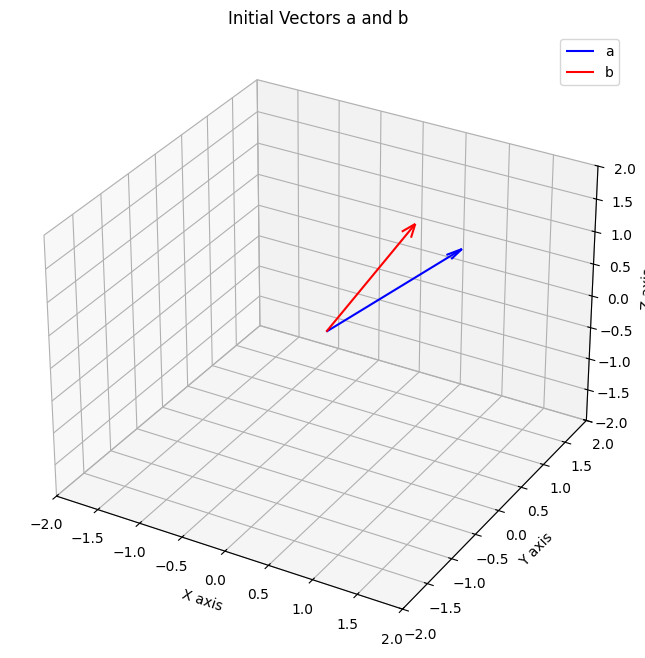

In [10]:
a = np.array([1,1,1])
b = np.array([1,0,2])
print(a.shape, b.shape)
initial_vectors = {'a': a, 'b': b}
plot_vectors_3d(initial_vectors, title="Initial Vectors a and b")

### Obtaining Orthogonal Vectors{#orthogonal}
We'll pick our first vector, `a`, and call it `A`. This is our first basis vector. Now, for the second vector `b`, we need to make it orthogonal to `A`. We do this by calculating the 'shadow' that `b` casts on `A` (its projection) and subtracting it from `b`. What's left is a new vector, `B`, that is perfectly perpendicular (orthogonal) to `A`.

Mathematically,
$$
A=a \\ \\
B = b- \frac{A^Tb}{A^TA}A
$$

Implementing the above equations in code.

In [11]:
def getB(A, b):
    
    num = np.dot(A.T, b)
    den = np.dot(A.T, A)
    frac = num/den 
    B = b - np.dot(frac, A)
    return B

A:
[1 1 1],
B:
[ 0. -1.  1.]


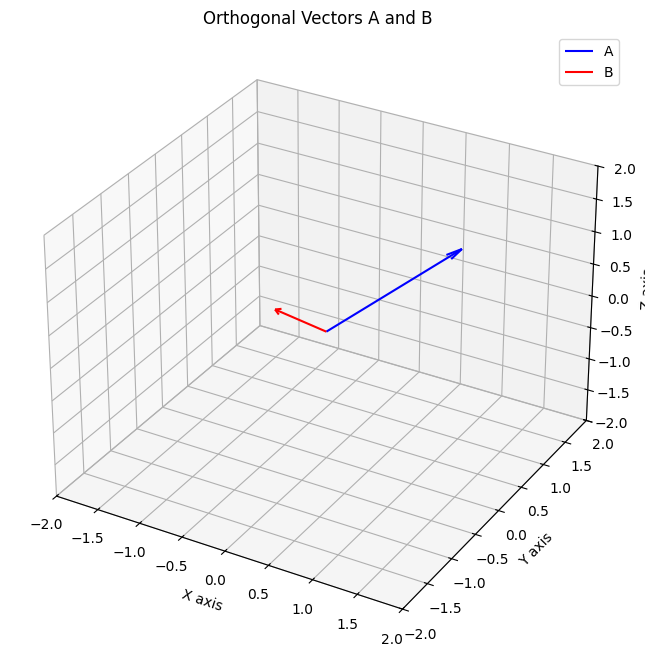

In [12]:
A = a 
B = getB(A, b)
print(f'A:\n{A},\nB:\n{B}')

orthogonal_vectors = {'A': A, 'B': B}
plot_vectors_3d(orthogonal_vectors, title="Orthogonal Vectors A and B")

In [7]:
dot_product = np.dot(A, B)
print(f'Dot product is {dot_product}!')

# length of vector
len_A = np.linalg.norm(A, ord=2)
len_B = np.linalg.norm(B, ord=2)
print(f'Length of A is {len_A}\nLength of B is {len_B}')

Dot product is 0.0!
Length of A is 1.7320508075688772
Length of B is 1.4142135623730951


The dot product is 0.0, which confirms `A` and `B` are **orthogonal**! However, we can see their lengths are not 1. This means they are an **orthogonal basis**, but not yet an **orthonormal one**.

In [65]:
A/np.linalg.norm(A, ord=2), np.linalg.norm(A/np.linalg.norm(A, ord=2), ord=2)

(array([0.57735027, 0.57735027, 0.57735027]), 1.0)

### Normalization{#normalization}
To make our vectors have a length of 1, we simply divide each vector by its own magnitude (its L2 norm). It is called normalization.

$$
Q1 = \frac{A}{||A||} \\
Q2 = \frac{B}{||B||}
$$

In [14]:
# getting orthonormal vectors 
def getQ(A, B):
    return A/np.linalg.norm(A, ord=2), B/np.linalg.norm(B, ord=2)

Q1:
[0.57735027 0.57735027 0.57735027],
Q2:
[ 0.         -0.70710678  0.70710678]


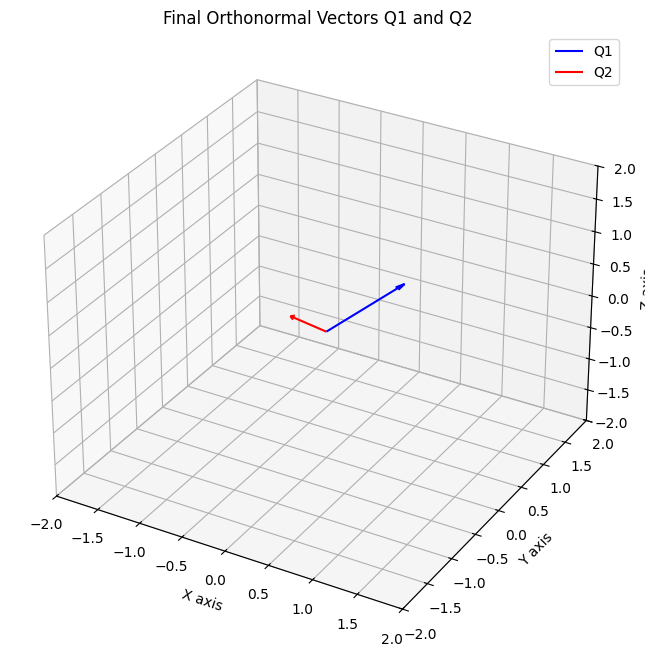

In [15]:
Q1, Q2 = getQ(A, B)

print(f'Q1:\n{Q1},\nQ2:\n{Q2}')

orthonormal_vectors = {'Q1': Q1, 'Q2': Q2}
plot_vectors_3d(orthonormal_vectors, title="Final Orthonormal Vectors Q1 and Q2")

In [11]:
dot_product = np.round(np.dot(Q1, Q2), decimals=3)
print(f'Dot product is {dot_product}!')

# length of vector
len_Q1 = np.round(np.linalg.norm(Q1, ord=2), decimals=3)
len_Q2 = np.round(np.linalg.norm(Q2, ord=2), decimals=3)
print(f'Length of Q1 is {len_Q1}\nLength of Q2 is {len_Q2}')

Dot product is 0.0!
Length of Q1 is 1.0
Length of Q2 is 1.0


There we go! The dot product of `Q1` and `Q2` is `0`, and their lengths are both `1`. We have successfully converted our initial vectors into an **orthonormal basis**.

### References:{#references}

- [Orthogonal Matrices: MIT Linear Algebra 2017 ](https://ocw.mit.edu/courses/18-06sc-linear-algebra-fall-2011/7ac32be444c25e48590f47573833ccc6_MIT18_06SCF11_Ses2.4sum.pdf)
- [Orthogonal and Orthonormal Vectors: James McCaffrey Wordpress](https://jamesmccaffrey.wordpress.com/2019/12/14/the-difference-between-orthogonal-and-orthonormal-vectors/)